Ранее мы рассматривали моноязычные модели, которые используются для распознавания эмоций на материале одного языка: [EmoNet](https://github.com/UBC-NLP/EmoNet) — английского, [ruBERT-tiny2-CEDR](https://huggingface.co/cointegrated/rubert-tiny2-cedr-emotion-detection) — русского.

Однако существуют и мультиязычные модели, которые используются для распознавания эмоций в текстах на 2 и более языках.

## XLM-EMO: Multilingual emotion prediction in social media text

XLM-EMO — модель, которая может быть использована для распознавания эмоций на  текстах из 19 языков: английского, арабского, бенгальского, вьетнамского, индонезийского, испанского, итальянского, китайского, корейского, малайского, немецкого, португальского, румынского, русского, тамильского, турецкого, филиппинского, французского, хинди.

Модель представлена в статье итальянской исследовательской группы [MilaNLP](https://milanlproc.github.io/) в области обработки естественного языка:

[Bianchi F. et al. 2022. XLM-EMO: Multilingual emotion prediction in social media text.](https://aclanthology.org/2022.wassa-1.18/)

Модель способна классифицировать тексты по четырем классам эмоций: радость (joy), гнев (anger), страх (fear), печаль (sadness).

📌 Отличается ли набор классов для XLM-EMO от рассмотренных раннее?

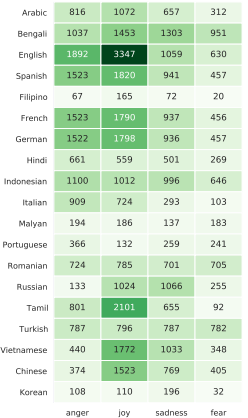

Модель XLM-EMO является результатом дообучения энкодерной модели для задачи распознавания эмоций. В качестве предобученной модели использовалась XLM-RoBERTa (XLM-R).

Модель RoBERTa является улучшенной версией модели BERT за счет более тщательного подбора гиперпараметров.

- больший объем обучающих данных (в 10 раз больше — от 16 Гб до 160 Гб) и размер словаря (от 30 000 до 50 000);
- динамическое маскирование: для каждого предложения используется 10 разных способов маскирования, через каждые 4 прохода по последовательности меняется позиция токена, который заменяется на маску;
- обучается только для маскированного языкового моделирования, предсказание следующего предложения исключается.

[Liu Y. et al. (2019). RoBERTa: A Robustly Optimized BERT Pretraining Approach](https://arxiv.org/abs/1907.11692).

XLM-RoBERTa — мультиязычная модель, обученная для 100 различных языков. Для предобучения использовалась только задача маскированного языкового моделирования. Широкий языковой охват стал возможен благодаря использованию данных CommonCrawl, автоматически собранных с различных веб-страниц.

Векторное представление токенов не содержит информации о языке, он определяется по индексам токенов. Это позволяет модели лучше справляться с переключением кодов. Словарь модели содержит 250 000 токенов. Было обучено две конфигурации: базовая XLM-R-base — 12 слоев, расширенная XLM-R-large — 24 слоя.

[Conneau A. et al. (2020) Unsupervised Cross-lingual Representation Learning at Scale.](https://aclanthology.org/2020.acl-main.747/)

📌 Каковы преимущества и недостатки мультиязычных моделей по сравнению с моноязычными?

Для дообучения на задачу распознавания эмоций использовались преимущественно данные социальных сетей: посты в Facebook и Twitter (заблокироваы на территории РФ), комментарии на YouTube. Предложения, которые содержали больше одной эмоции, удалялись. Модель не обучалась на текстах ни одного африканского языка, поскольку не было найдено соответствующих наборов данных.

Было проведено дообучение трех моделей:
- XLM-R-large
- XLM-T-base (XLM-R-base, дообученная на текстах из Твиттера)
- XLM-R-base

📌 Какая модель показывает наибольшее среднее значение F-меры?

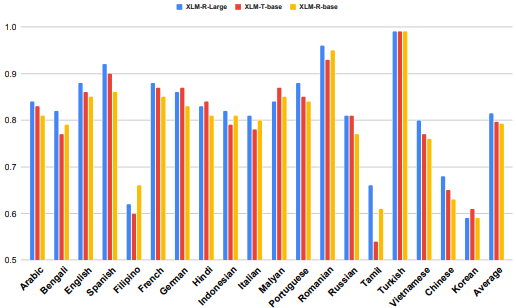

Было проведено сравнение модели XLM-EMO с моноязычными моделями (BERT-large) для [английского](https://huggingface.co/bert-large-uncased), [арабского](https://huggingface.co/aubmindlab/bert-large-arabertv02-twitter) и [вьетнамского](https://huggingface.co/vinai/phobert-large). Тестирование проводилось на отдельных наборах данных, которые не использовались для обучения XLM-EMO. Данные были разделены в соотношении 80/20.
- Моноязычные модели были дообучены на 80% данных и протестированы на 20% (Lang-Specific)
- Модель XLM-EMO протестирована на 20% данных (ZeroShot)
- Модель XLM-EMO дообучена на 80% данных и протестирована на 20% (Trained)

📌 Как можно прокомментировать результаты?

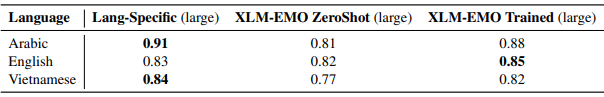

## Тестирование XLM-EMO

Модель [XLM-EMO](https://huggingface.co/MilaNLProc/xlm-emo-t) для распознавания эмоций доступна в библиотеке Transformers. Несмотря на то, что наибольшее значение F-меры достигается при дообучении XLM-R-large, выложенна модель, которая получена при дообучении XLM-T-base.

In [ ]:
!pip install transformers datasets -q

Поскольку модель мультиязычная, можно протестировать ее на разных языках: например, французском, испанском, немецком и английском.

In [ ]:
input = ["Quelle bonne nouvelle!", # Какая прекрасная новость (fr)
         "No me encuentro bien.", # Я плохо себя чувствую (es)
         "Hör endlich auf, mich zu nerven!", # Наконец перестань меня доставать (de)
         "We are extremely worried."] # Мы чрезвычайно обеспокоены (en)

Рассмотрим два способа применения модели:
1. пайплайн
2. токенизатор и модель

### Пайплайн

Пайплайн в машинном обучении — это процесс обработки данных от начала до конца, включая ввод данных, их предобработку, применение модели с установленными параметрами и вывод результата.

📌 Загрузите модель XLM-EMO в качестве пайплайна.

In [ ]:
# Место для вашего кода

При использовании пайплайна не нужно отдельно загружать модель и токенизатор, весь процесс предобработки и записи предсказанных ответов происходит автоматически.

📌 Примените пайплайн ко всем предложениям в списке.

In [ ]:
# Место для вашего кода

### Токенизатор и модель

Аналогичный результат можно получить, загрузив отдельно токенизатор и модель.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("MilaNLProc/xlm-emo-t")
model = AutoModelForSequenceClassification.from_pretrained("MilaNLProc/xlm-emo-t")

При применении токенизатора к предложению нужно указать, что индексы токенов и маски внимания должны иметь тип `torch.Tensor`.

In [ ]:
sentence = "Guarda! ci sono dei bellissimi capibara!" # Смотри! Красивые капибары! (it)
tokenized_sent = tokenizer(sentence, return_tensors='pt')
tokenized_sent

Для применения модели к токенизированному предложению можно передать индексы токенов и маску внимания в отдельных переменных или использовать **, то есть не указывать, какое количество аргументов получает модель.

In [ ]:
output = model(input_ids=tokenized_sent['input_ids'],
               attention_mask=tokenized_sent['attention_mask'])
#output = model(**tokenized_sent)
output

Нас интересуют логиты — выходные значения модели. Чтобы зафиксировать предсказанный класс, нужно найти позицию наибольшего элемента.

In [ ]:
logits = output.logits
logits

In [ ]:
predicted_class_id = logits.argmax().item()
predicted_class_id

Соответствие числовых и словесных обозначений классов доступно в словаре `id2label`. Используя позицию наибольшего элемента как ключ, можно получить название предсказанной эмоции.

In [ ]:
model.config.id2label

In [ ]:
model.config.id2label[predicted_class_id]

📌 Создайте функцию для записи предсказанного эмоционального класса. Функция должна принимать на вход предложение, токенизатор и модель. В ней следует объединить все описанные выше этапы: токенизацию предложения, применение модели, запись выходных значений, поиск позиции наибольшего элемента, определение названия предсказанного класса.

In [ ]:
import torch
def predict_emotion(sentence, tokenizer, model):
  # Место для вашего кода

📌 Примените функцию ко всем примерам в списке `input`.

In [ ]:
# Место для вашего кода

## Применение XLM-EMO к корпусу CEDR

При дообучении модели XLM-EMO в качестве русскоязычного материала была использована часть предложений из корпуса CEDR:
- обучающая выборка
- источник — Twitter
- эмоции — радость, печаль, страх, гнев
- только одна эмоциональная метка

Следовательно, можно протестировать качество модели на тестовой выборке корпуса CEDR.

📌 Загрузите тестовую выборку корпуса CEDR из библиотеки Datasets.

In [ ]:
from datasets import load_dataset

cedr = # Место для вашего кода

Сложность состоит в том, что количество классов и их порядок в корпусе и для модели различается.

In [ ]:
cedr.features

In [ ]:
pipe.model.config.id2label

Вначале удалим из корпуса предложения, которые содержат лишние эмоции: нейтральный класс, удивление или сразу несколько эмоций. Создадим функцию для фильтрации `filter_by_emotion`. Она вводит условие, которому должны соответствовать нужные нам предложения: метка класса содержит одно значение, оно принадлежит к заданному списку.

Применим эту функцию для отбора предложений в корпусе.

In [ ]:
def filter_by_emotion(example):
    return len(example["labels"]) == 1 and example["labels"][0] in [0,1,3,4]

cedr_filtered = cedr.filter(filter_by_emotion)

📌 Проверьте, что количество предложений в корпусе уменьшилось.

In [ ]:
# Место для вашего кода

Теперь необходимо привести в соответствие метки классов. Создадим словарь соответствия эмоций в корпусе и для модели. В качестве ключей выступают метки CEDR (числа), в качестве значений — метки XLM-EMO (слова).

Затем добавим новый атрибут для каждого объекта корпуса — `xlm_label`. Запишем в него значение из созданного словаря, которое получаем по ключу — уже имеющейся метке класса.

In [ ]:
mapping_dict = {0: 'joy', 1: 'sadness', 3: 'fear', 4: 'anger'}
cedr_mapped = cedr_filtered.map(lambda x: {'xlm_label': mapping_dict[x['labels'][0]]}, batched=False)

In [ ]:
cedr_mapped

In [ ]:
cedr_mapped[0]

Теперь можно применить модель в качестве пайплайна ко всем предложениям корпуса.

📌 В переменную `preds` запишите предсказания модели XLM-EMO для предложений тестовой выборки корпуса CEDR. Обратите внимание, что выходы модели имеют формат словаря. Ответом же должно быть только название эмоции.

In [ ]:
# Место для вашего кода

Выведем результат в виде отчета о классификации. Порядок классов должен соответствовать порядку для модели XLM-EMO.

In [ ]:
from sklearn.metrics import classification_report
target_names = ['anger', 'fear', 'joy', 'sadness']
print(classification_report(cedr_mapped['xlm_label'], preds, target_names=target_names))